# Cuisine Analysis
---
## Goal
- Use Spoonacular API and the U.S. Department of Health and Human Services' 2015 Dietary Guidelines to evaluate the macronutrient profiles and accessibility for people with health-related dietary restrictions of a set cuisines.
## Questions
- What are the macronutrient profiles of certain cuisines?
- Which cuisine (mexican, american or chinese) is the most accessible to people dairy and gluten intolerance?
- Which cuisine (mexican, american or chinese) is the most inline with the UDH recommended macronutrient break down?
- Are there outliers that are skewing the data of one of the cusines when broken down into carbs, protein and fat?

## Definitions
- "Macronutrient profiles": the ratio of the percentages of carbohydrates, protein, and fat on average for a servings of a recipe of a given cuisine
- "Accessibility": the percentage of recipes for a given cuisine that does not contain gluten or dairy
- "Balanced": description of a macronutrient profile that matches (within 5 percentage points) the recommended nutritional goals for carbohydrates, protein, and total fat for male and female adults ages 19-50
---

# DataFrame creation

In [439]:
# Dependencies and API key
import pandas as pd
import matplotlib.pyplot as plt
import statistics as stats
import scipy.stats
import json 
import requests
import collections

from API_key import API_key

In [440]:
#Retrieve 43 recipe IDs per cuisine (American, Chinese, Mexican)
cuisines = ["American", "Chinese", "Mexican"] 
recipe_data = []

base_url = "https://api.spoonacular.com/recipes/complexSearch"

number = 43

# for cuisine in cuisines:
for cuisine in cuisines:  
    target_url = f"{base_url}?apiKey={API_key}&cuisine={cuisine}&number={number}"
    
    recipe_info = requests.get(target_url).json()
    
# Parse out each ID in recipe batch
    for i in range(0, 43):
        recipe_id = recipe_info["results"][i]["id"]
        recipe_data.append({"ID": recipe_id})

# print(json.dumps(recipe_info, indent=4, sort_keys=True))    
recipe_data


[{'ID': 715424},
 {'ID': 646512},
 {'ID': 1046982},
 {'ID': 642540},
 {'ID': 639392},
 {'ID': 644581},
 {'ID': 633837},
 {'ID': 660395},
 {'ID': 638552},
 {'ID': 638764},
 {'ID': 660288},
 {'ID': 795749},
 {'ID': 636573},
 {'ID': 637631},
 {'ID': 642695},
 {'ID': 1096277},
 {'ID': 775621},
 {'ID': 637897},
 {'ID': 673457},
 {'ID': 662376},
 {'ID': 637265},
 {'ID': 657226},
 {'ID': 649141},
 {'ID': 641627},
 {'ID': 634888},
 {'ID': 1095894},
 {'ID': 635059},
 {'ID': 1697611},
 {'ID': 641845},
 {'ID': 638549},
 {'ID': 664011},
 {'ID': 660273},
 {'ID': 610281},
 {'ID': 662391},
 {'ID': 991010},
 {'ID': 650377},
 {'ID': 651190},
 {'ID': 637102},
 {'ID': 650546},
 {'ID': 1066893},
 {'ID': 1096060},
 {'ID': 665146},
 {'ID': 659058},
 {'ID': 716426},
 {'ID': 716311},
 {'ID': 644826},
 {'ID': 660231},
 {'ID': 663150},
 {'ID': 638642},
 {'ID': 638649},
 {'ID': 638369},
 {'ID': 663169},
 {'ID': 646425},
 {'ID': 656777},
 {'ID': 638722},
 {'ID': 667701},
 {'ID': 638714},
 {'ID': 643808},
 {'ID': 

In [441]:
#Convert recipe_data into a list of recipe IDs
recipe_id_list = [*[list(idx.values()) for idx in recipe_data ]]
recipe_id_list = [element for innerList in recipe_id_list for element in innerList]
recipe_id_list_string = map(str, recipe_id_list)
recipe_id_list_string = (','.join(recipe_id_list_string))
# print(len(recipe_id_list))

In [442]:
#split recipe_id_list for processing
recipe_id_list_pt1 = recipe_id_list[:len(recipe_id_list)//2]
recipe_id_list_pt2 = recipe_id_list[len(recipe_id_list)//2:]

In [443]:
#TEST REQUEST AND  VIEW JSON FORMAT
# base_url_2 = "https://api.spoonacular.com/recipes"
# target_url_2 = f"{base_url_2}/639413/information?apiKey={API_key}&includeNutrition=True"
# recipe_info_2 = requests.get(target_url_2).json()

# with open("myTest.json", "w") as f:
#   json.dump(recipe_info_2, f, indent=2)
# f.close()

In [444]:
#Retrieve cuisine, recipe name, ingredient list, protein/serving, carbs/serving, and fat/serving for each recipe ID
base_url_2 = "https://api.spoonacular.com/recipes"

recipe_data_pt1 = []

print('Beginning Data Retrieval')
print('------------------------')
# Parse out needed info from each recipe
for id in recipe_id_list_pt1:
    
    target_url_2 = f"{base_url_2}/{id}/information?apiKey={API_key}&includeNutrition=True"
    
    print('Processing', id)
    
    try:
        
        recipe_info_2 = requests.get(target_url_2).json()
        
        recipe_id = recipe_info_2["id"]
        recipe_title = recipe_info_2["title"]
        recipe_cuisine = recipe_info_2["cuisines"][0]
        recipe_gluten = recipe_info_2["glutenFree"]
        recipe_dairy = recipe_info_2['dairyFree']
        recipe_protein = recipe_info_2["nutrition"]["nutrients"][8]["amount"]
        recipe_carbs = recipe_info_2["nutrition"]["nutrients"][3]["amount"]
        recipe_fat = recipe_info_2["nutrition"]["nutrients"][1]["amount"]
        recipe_data_pt1.append({"ID": recipe_id,
                            "Title": recipe_title,
                            "Cuisine": recipe_cuisine,
                            "Gluten-free?": recipe_gluten,
                            "Dairy-free?": recipe_dairy,
                            "Protein/serving": recipe_protein,
                            "Carbs/serving": recipe_carbs,
                            "Fat/serving": recipe_fat})
        
    except:
        print("Recipe not found, skipping...")
        pass
    
print('------------------------')
print('Data Retrieval Complete')

Beginning Data Retrieval
------------------------
Processing 715424
Processing 646512
Processing 1046982
Processing 642540
Processing 639392
Processing 644581
Processing 633837
Processing 660395
Processing 638552
Processing 638764
Processing 660288
Processing 795749
Processing 636573
Processing 637631
Processing 642695
Processing 1096277
Processing 775621
Processing 637897
Processing 673457
Processing 662376
Processing 637265
Processing 657226
Processing 649141
Processing 641627
Processing 634888
Processing 1095894
Processing 635059
Processing 1697611
Processing 641845
Processing 638549
Processing 664011
Processing 660273
Processing 610281
Processing 662391
Processing 991010
Processing 650377
Processing 651190
Processing 637102
Processing 650546
Processing 1066893
Processing 1096060
Processing 665146
Processing 659058
Processing 716426
Processing 716311
Processing 644826
Processing 660231
Processing 663150
Processing 638642
Processing 638649
Processing 638369
Processing 663169
Processi

In [445]:
#save recipe_data_pt1 to csv
df = pd.DataFrame(recipe_data_pt1)
     
# saving the dataframe
df.to_csv('recipe_data_pt1.csv')


In [446]:
#Retrieve cuisine, recipe name, ingredient list, protein/serving, carbs/serving, and fat/serving for each recipe ID
base_url_2 = "https://api.spoonacular.com/recipes"

recipe_data_pt2 = []

print('Beginning Data Retrieval')
print('------------------------')
# Parse out needed info from each recipe
for id in recipe_id_list_pt2:
    
    target_url_2 = f"{base_url_2}/{id}/information?apiKey={API_key}&includeNutrition=True"
    
    print('Processing', id)
    
    try:
        
        recipe_info_2 = requests.get(target_url_2).json()
        
        recipe_id = recipe_info_2["id"]
        recipe_title = recipe_info_2["title"]
        recipe_cuisine = recipe_info_2["cuisines"][0]
        recipe_gluten = recipe_info_2["glutenFree"]
        recipe_dairy = recipe_info_2['dairyFree']
        recipe_protein = recipe_info_2["nutrition"]["nutrients"][8]["amount"]
        recipe_carbs = recipe_info_2["nutrition"]["nutrients"][3]["amount"]
        recipe_fat = recipe_info_2["nutrition"]["nutrients"][1]["amount"]
        recipe_data_pt2.append({"ID": recipe_id,
                            "Title": recipe_title,
                            "Cuisine": recipe_cuisine,
                            "Gluten-free?": recipe_gluten,
                            "Dairy-free?": recipe_dairy,
                            "Protein/serving": recipe_protein,
                            "Carbs/serving": recipe_carbs,
                            "Fat/serving": recipe_fat})
        
    except:
        print("Recipe not found, skipping...")
        pass
    
print('------------------------')
print('Data Retrieval Complete')

Beginning Data Retrieval
------------------------
Processing 660707
Processing 638717
Processing 638668
Processing 659038
Processing 643786
Processing 643832
Processing 638631
Processing 659906
Processing 682619
Processing 652354
Processing 648475
Processing 662744
Processing 638693
Processing 643011
Processing 640323
Processing 649129
Processing 664551
Processing 664650
Processing 638729
Processing 664624
Recipe not found, skipping...
Processing 642125
Recipe not found, skipping...
Processing 639741
Processing 795751
Recipe not found, skipping...
Processing 640062
Recipe not found, skipping...
Processing 715421
Recipe not found, skipping...
Processing 715543
Processing 715533
Recipe not found, skipping...
Processing 715391
Recipe not found, skipping...
Processing 975070
Recipe not found, skipping...
Processing 640117
Processing 715567
Recipe not found, skipping...
Processing 637157
Recipe not found, skipping...
Processing 664501
Processing 645856
Recipe not found, skipping...
Processi

In [447]:
# #create dataframe
#  = pd.DataFrame(recipe_data_pt2)
     
# save the dataframe
recipe_data_pt2_df = pd.read_csv("recipe_data_pt2_renee.csv", header = 0)

In [448]:
#read recipe_data_pt1.csv
recipe_data_pt1_df = pd.read_csv("recipe_data_pt1_renee.csv", header = 0)

In [449]:
#Merge DataFrames
frames = [recipe_data_pt1_df, recipe_data_pt2_df]
recipe_data_df = pd.concat(frames, ignore_index = True)
recipe_data_df

,ID,Title,Cuisine,Gluten-free?,Dairy-free?,Protein/serving,Carbs/serving,Fat/serving,Unnamed: 0
0,715424,The Best Chili,American,True,True,33.42,34.93,6.95,NaN
1,646512,Salmon Caesar Salad,American,True,False,26.90,7.17,28.96,NaN
2,1046982,How to Make the Perfect Sweet Potato Sloppy Joes,American,True,True,48.91,84.96,18.06,NaN
3,642540,Falafel Burgers,American,False,True,23.31,80.23,35.46,NaN
4,639392,Chunky Two-Bean Chili,American,False,False,23.06,84.78,26.39,NaN
...,...,...,...,...,...,...,...,...,...
124,650798,Mango Kiwi Salsa,Mexican,True,True,2.01,19.31,0.63,60.0
125,1095842,Loaded Paleo Nachos With Fresh Salsa & Guacamole,Mexican,True,True,30.47,86.63,49.29,61.0
126,645988,Guacamole,Mexican,True,True,2.19,10.02,14.82,62.0
127,660943,Spiced Chicken With Black Bean and Mango Salsa,Mexican,True,True,55.96,48.25,31.85,63.0


# Macro-nutrient Profiles

Text(0, 0.5, 'American Cuisine Macro-nutrient Profile')

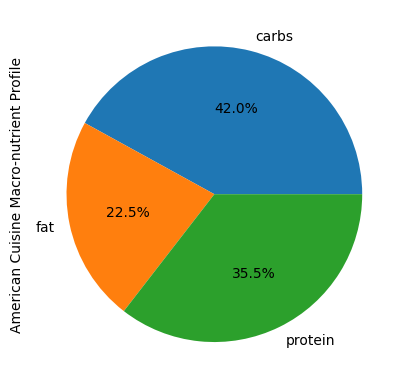

In [451]:
#American
am_carbs = recipe_data_df.loc[recipe_data_df['Cuisine'] == "American", 'Carbs/serving']
am_carbs = am_carbs.mean()

am_fat = recipe_data_df.loc[recipe_data_df['Cuisine'] == "American", 'Fat/serving']
am_fat = am_fat.mean()

am_protein = recipe_data_df.loc[recipe_data_df['Cuisine'] == "American", 'Protein/serving']
am_protein = am_protein.mean()

am_averages = [am_carbs, am_fat, am_protein]
labels = ["carbs", "fat", "protein"]

plt.pie(am_averages, labels=labels, autopct='%1.1f%%')
plt.ylabel("American Cuisine Macro-nutrient Profile")


In [452]:
#calculate percentage's for american macro breakdown
am_carbs_sum = am_carbs.sum()
am_fat_sum = am_fat.sum()
am_protein_sum = am_protein.sum()

amer_macro_sum_list = []

amer_macro_sum_list.append(am_carbs_sum)
amer_macro_sum_list.append(am_fat_sum)
amer_macro_sum_list.append(am_protein_sum)

am_macro_total = sum(amer_macro_sum_list)

am_carb_perc = am_carbs_sum/am_macro_total
print(am_carb_perc)

am_fat_perc = am_fat/am_macro_total
print(am_fat_perc)

am_protein_perc = am_protein/am_macro_total
print(am_protein_perc)


0.42000255553730165
0.2251496814705292
0.3548477629921692


43     28.93
44     95.36
45     28.70
46     18.89
47     60.63
48     48.01
49     11.35
50     41.26
51     29.07
52     75.03
53     55.50
54     12.29
55     56.94
56     62.70
57     19.89
58     78.07
59     71.18
60     12.99
61     11.12
62     30.25
63     66.03
64     13.92
65     42.85
66     27.59
67     28.83
68     46.90
69     11.85
70     15.12
71     51.49
72     60.33
73     21.84
74      6.10
75      9.99
76     18.27
77     14.63
78      5.41
79      0.94
80      5.71
81      5.79
82     81.04
83     14.44
84    117.67
85     27.17
Name: Carbs/serving, dtype: float64


Text(0, 0.5, 'Chinese Cuisine Macro-nutrient Profile')

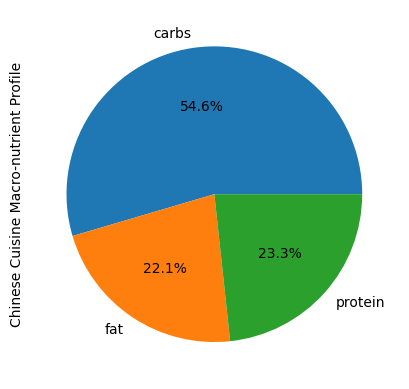

In [453]:
#Chinese
ch_carbs = recipe_data_df.loc[recipe_data_df['Cuisine'] == "Chinese", 'Carbs/serving']
print(ch_carbs)

ch_carbs = ch_carbs.mean()

ch_fat = recipe_data_df.loc[recipe_data_df['Cuisine'] == "Chinese", 'Fat/serving']
ch_fat = ch_fat.mean()

ch_protein = recipe_data_df.loc[recipe_data_df['Cuisine'] == "Chinese", 'Protein/serving']
ch_protein = ch_protein.mean()

ch_averages = [ch_carbs, ch_fat, ch_protein]
labels = ["carbs", "fat", "protein"]

plt.pie(ch_averages, labels=labels, autopct='%1.1f%%')
plt.ylabel("Chinese Cuisine Macro-nutrient Profile")

Text(0, 0.5, 'Mexican Cuisine Macro-nutrient Profile')

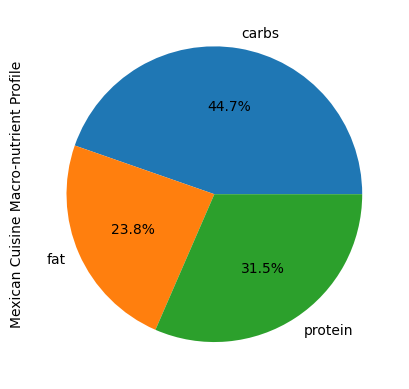

In [454]:
#Mexican
mx_carbs = recipe_data_df.loc[recipe_data_df['Cuisine'] == "Mexican", 'Carbs/serving']
mx_carbs = mx_carbs.mean()

mx_fat = recipe_data_df.loc[recipe_data_df['Cuisine'] == "Mexican", 'Fat/serving']
mx_fat = mx_fat.mean()

mx_protein = recipe_data_df.loc[recipe_data_df['Cuisine'] == "Mexican", 'Protein/serving']
mx_protein = mx_protein.mean()

mx_averages = [mx_carbs, mx_fat, mx_protein]
labels = ["carbs", "fat", "protein"]

plt.pie(mx_averages, labels=labels, autopct='%1.1f%%')
plt.ylabel("Mexican Cuisine Macro-nutrient Profile")

# Accessibility

([0, 1, 2],
 [Text(0, 0, 'Gluten'), Text(1, 0, 'Dairy'), Text(2, 0, 'Gluten and Dairy')])

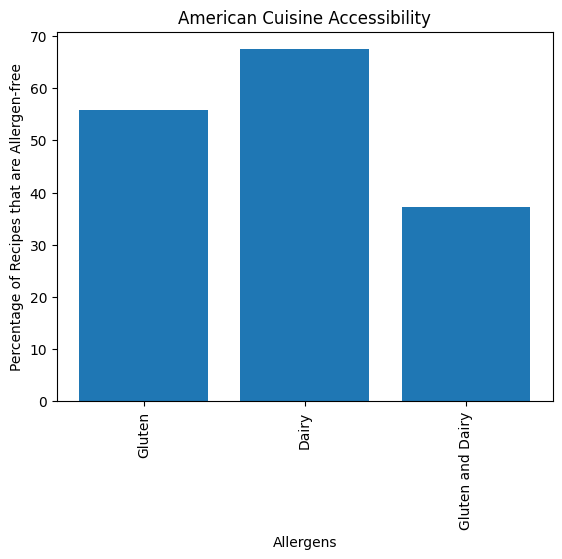

In [455]:
#Calculate percentage of recipes that are gluten-free, dairy-free, and both and create visualization per cuisine
#American
#gluten
am_gluten = recipe_data_df.loc[recipe_data_df['Cuisine'] == "American", 'Gluten-free?'].value_counts()[True]
am_gluten = (am_gluten/43)*100

#dairy
am_dairy = recipe_data_df.loc[recipe_data_df['Cuisine'] == "American", 'Dairy-free?'].value_counts()[True]
am_dairy = (am_dairy/43)*100

#both
am_gluten_dairy = recipe_data_df.loc[recipe_data_df['Cuisine'] == "American"]
am_gluten_dairy = am_gluten_dairy.loc[(am_gluten_dairy['Gluten-free?'] == True) & 
                                      (am_gluten_dairy['Dairy-free?'] == True)].count()
am_gluten_dairy = am_gluten_dairy[0]
am_gluten_dairy = (am_gluten_dairy/43)*100

#bar chart
am_data = {"Gluten": am_gluten,
           "Dairy": am_dairy,
           "Gluten and Dairy": am_gluten_dairy}
labels = list(am_data.keys())
values = list(am_data.values())

am_bar = plt.bar(labels, values)
plt.title("American Cuisine Accessibility")
plt.xlabel("Allergens")
plt.ylabel("Percentage of Recipes that are Allergen-free")
plt.xticks(rotation = 90)


([0, 1, 2],
 [Text(0, 0, 'Gluten'), Text(1, 0, 'Dairy'), Text(2, 0, 'Gluten and Dairy')])

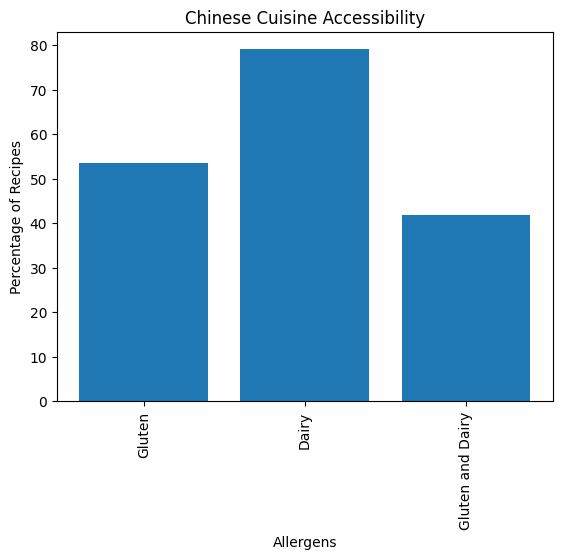

In [456]:
#Chinese
#gluten
ch_gluten = recipe_data_df.loc[recipe_data_df['Cuisine'] == "Chinese", 'Gluten-free?'].value_counts()[True]
ch_gluten = (ch_gluten/43)*100

#dairy
ch_dairy = recipe_data_df.loc[recipe_data_df['Cuisine'] == "Chinese", 'Dairy-free?'].value_counts()[True]
ch_dairy = (ch_dairy/43)*100

#both
ch_gluten_dairy = recipe_data_df.loc[recipe_data_df['Cuisine'] == "Chinese"]
ch_gluten_dairy = ch_gluten_dairy.loc[(ch_gluten_dairy['Gluten-free?'] == True) & 
                                      (ch_gluten_dairy['Dairy-free?'] == True)].count()
ch_gluten_dairy = ch_gluten_dairy[0]
ch_gluten_dairy = (ch_gluten_dairy/43)*100

#bar chart
ch_data = {"Gluten": ch_gluten,
           "Dairy": ch_dairy,
           "Gluten and Dairy": ch_gluten_dairy}
labels = list(ch_data.keys())
values = list(ch_data.values())

ch_bar = plt.bar(labels, values)
plt.title("Chinese Cuisine Accessibility")
plt.xlabel("Allergens")
plt.ylabel("Percentage of Recipes")
plt.xticks(rotation = 90)


([0, 1, 2],
 [Text(0, 0, 'Gluten'), Text(1, 0, 'Dairy'), Text(2, 0, 'Gluten and Dairy')])

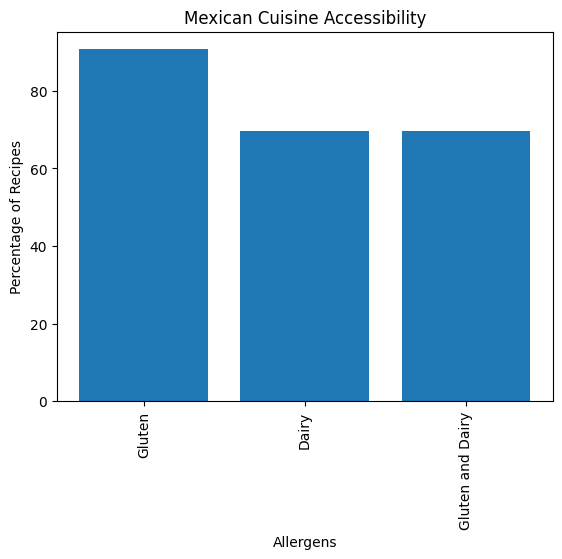

In [457]:
#Mexican
#gluten
mx_gluten = recipe_data_df.loc[recipe_data_df['Cuisine'] == "Mexican", 'Gluten-free?'].value_counts()[True]
mx_gluten = (mx_gluten/43)*100

#dairy
mx_dairy = recipe_data_df.loc[recipe_data_df['Cuisine'] == "Mexican", 'Dairy-free?'].value_counts()[True]
mx_dairy = (mx_dairy/43)*100

#both
mx_gluten_dairy = recipe_data_df.loc[recipe_data_df['Cuisine'] == "Mexican"]
mx_gluten_dairy = mx_gluten_dairy.loc[(mx_gluten_dairy['Gluten-free?'] == True) & 
                                      (mx_gluten_dairy['Dairy-free?'] == True)].count()
mx_gluten_dairy = mx_gluten_dairy[0]
mx_gluten_dairy = (mx_gluten_dairy/43)*100

#bar chart
mx_data = {"Gluten": mx_gluten,
           "Dairy": mx_dairy,
           "Gluten and Dairy": mx_gluten_dairy}
labels = list(mx_data.keys())
values = list(mx_data.values())

mx_bar = plt.bar(labels, values)
plt.title("Mexican Cuisine Accessibility")
plt.xlabel("Allergens")
plt.ylabel("Percentage of Recipes")
plt.xticks(rotation = 90)

# Statistical Analysis

In [468]:
#calculate percentage's for american macro breakdown

#Define empty lists
amer_macro_sum_list = []
amer_macros = []

#Find total grams for each macro under american cusisine
am_carbs_sum = am_carbs.sum()
am_fat_sum = am_fat.sum()
am_protein_sum = am_protein.sum()

#Append total grams to macro_sum_list
amer_macro_sum_list.append(am_carbs_sum)
amer_macro_sum_list.append(am_fat_sum)
amer_macro_sum_list.append(am_protein_sum)

#Sum all macros
am_macro_total = sum(amer_macro_sum_list)

#Perform algebra and find percetages
am_carb_perc = am_carbs_sum/am_macro_total * 100
am_fat_perc = am_fat/am_macro_total * 100
am_protein_perc = am_protein/am_macro_total * 100

#Append to amer_macros
amer_macros.append(am_carb_perc)
amer_macros.append(am_fat_perc)
amer_macros.append(am_protein_perc)

print(amer_macros)


[42.00025555373016, 22.51496814705292, 35.48477629921692]


In [430]:
#calculate percentage's for mexican macro breakdown

#Define empty lists
mex_macro_sum_list = []
mex_macros = []

#Find total grams for each macro under american cusisine
mex_carbs_sum = mx_carbs.sum()
mex_fat_sum = mx_fat.sum()
mex_protein_sum = mx_protein.sum()

#Append total grams to macro_sum_list
mex_macro_sum_list.append(mex_carbs_sum)
mex_macro_sum_list.append(mex_fat_sum)
mex_macro_sum_list.append(mex_protein_sum)

#Sum all macros
mex_macro_total = sum(mex_macro_sum_list)

#Perform algebra and find percetages
mex_carb_perc = mex_carbs_sum/mex_macro_total * 100
mex_fat_perc = mex_fat_sum/mex_macro_total * 100
mex_protein_perc = mex_protein_sum/mex_macro_total * 100

#Append to amer_macros
mex_macros.append(mex_carb_perc)
mex_macros.append(mex_fat_perc)
mex_macros.append(mex_protein_perc)

print(mex_macros)

[44.65774830589543, 23.82038735268928, 31.521864341415284]


In [431]:
#calculate percentage's for chinese macro breakdown

#Define empty lists
chin_macro_sum_list = []
chin_macros = []

#Find total grams for each macro under american cusisine
chin_carbs_sum = ch_carbs.sum()
chin_fat_sum = ch_fat.sum()
chin_protein_sum = ch_protein.sum()

#Append total grams to macro_sum_list
chin_macro_sum_list.append(chin_carbs_sum)
chin_macro_sum_list.append(chin_fat_sum)
chin_macro_sum_list.append(chin_protein_sum)

#Sum all macros
chin_macro_total = sum(chin_macro_sum_list)

#Perform algebra and find percetages
chin_carb_perc = chin_carbs_sum/chin_macro_total * 100
chin_fat_perc = chin_fat_sum/chin_macro_total * 100
chin_protein_perc = chin_protein_sum/chin_macro_total * 100

#Append to amer_macros
chin_macros.append(chin_carb_perc)
chin_macros.append(chin_fat_perc)
chin_macros.append(chin_protein_perc)

print(chin_macros)

[54.56317824931622, 22.143789739615954, 23.293032011067822]


In [432]:
#Organize macro-nutrient profiles from least to most balanced (least to most closely matching UDH's recommendation)

#UDH Macros dataframe
#Identify UDH standards of C/FP
percentages = [50, 30, 20]
labels = ["Carbs", "Fat", "Protein"]

zip_df = zip(labels,percentages)

#Create df w/ udf and cusisine macros
udh_df = pd.DataFrame.from_dict(dict(zip_df), orient='index', columns=['UDH reccomendation'])
udh_df['Mexican Macros'] = mex_macros
udh_df['Chinese Macros'] = chin_macros
udh_df['American Macros'] = amer_macros


 #Change all floats to integers
udh_df['Mexican Macros'] = udh_df['Mexican Macros'].astype(int)
udh_df['Chinese Macros'] = udh_df['Chinese Macros'].astype(int)
udh_df['American Macros'] = udh_df['American Macros'].astype(int)

udh_df


,UDH reccomendation,Mexican Macros,Chinese Macros,American Macros
Carbs,50,44,54,42
Fat,30,23,22,22
Protein,20,31,23,35


In [433]:
#Perform algebra to get the difference in % points (UDH vs. Cuisine)
udh_df["Mexican vs UDH"] = udh_df["UDH reccomendation"]-udh_df["Mexican Macros"]
udh_df["Chinese vs UDH"] = udh_df["UDH reccomendation"]-udh_df["Chinese Macros"]
udh_df["American vs UDH"] = udh_df["UDH reccomendation"]-udh_df["American Macros"]

udh_df

,UDH reccomendation,Mexican Macros,Chinese Macros,American Macros,Mexican vs UDH,Chinese vs UDH,American vs UDH
Carbs,50,44,54,42,6,-4,8
Fat,30,23,22,22,7,8,8
Protein,20,31,23,35,-11,-3,-15


In [434]:
#Create a dataframe with the absolute difference in % points (UDG vs Cuisines)
df2 = udh_df[['Mexican vs UDH', 'Chinese vs UDH', 'American vs UDH']].copy()
df3 = (df2.abs())
df3.loc['Absolute Difference of % Points']= df3.sum(numeric_only=True, axis=0)
df3

,Mexican vs UDH,Chinese vs UDH,American vs UDH
Carbs,6,4,8
Fat,7,8,8
Protein,11,3,15
Absolute Difference of % Points,24,15,31


In [435]:
#Create a dictionary of gluten intorlerances and organize by cuisine 
gluten_list = []
gluten_list_labels = ['Mexican','Chinese','American']

#Append the average amout of gluten for each cusines to gluten_list
gluten_list.append(mx_gluten)
gluten_list.append(ch_gluten)
gluten_list.append(am_gluten)

#zip together ave amount of gluten and cuisine name
d1 =zip(gluten_list_labels,gluten_list)
od = collections.OrderedDict((dict(d1).items()))
od

OrderedDict([('Mexican', 90.69767441860465),
             ('Chinese', 53.48837209302325),
             ('American', 55.81395348837209)])

In [436]:
#Create Pandas DF, average gluten and cuisine
#Define lists
labels_gluten = ['Bad for GF', 'Okay for GF', 'Best for GF']
gluten_list_labels = ['Mexican','Chinese','American']

#Create pandas dataframe
df = pd.DataFrame.from_dict(od, orient='index', columns=['% of Recipies GF'])
df['% of Recipies GF'] = df['% of Recipies GF'].astype(int)

#Sort percent of allergen free recipies from least to most
df = df.sort_values('% of Recipies GF')

#Add columns and set indexes
df['Gluten Content'] = labels_gluten
df['Cuisine'] = gluten_list_labels
df.set_index('Gluten Content')

,% of Recipies GF,Cuisine
Gluten Content,,
Bad for GF,53,Mexican
Okay for GF,55,Chinese
Best for GF,90,American


In [437]:
#Create a dictionary of gluten intorlerances and organize by cuisine 
dairy_list = []
dairy_list_labels = ['Mexican','Chinese','American']

#Append the average amout of gluten for each cusines to dairy_list
dairy_list.append(mx_dairy)
dairy_list.append(ch_dairy)
dairy_list.append(am_dairy)

#zip together ave amount of gluten and cuisine name
d2 =zip(dairy_list_labels,dairy_list)
od2 = collections.OrderedDict(sorted(dict(d2).items()))
od2


OrderedDict([('American', 67.44186046511628),
             ('Chinese', 79.06976744186046),
             ('Mexican', 69.76744186046511)])

In [469]:
#Create Pandas DF, average gluten and cuisine
#Define lists
labels_dairy = ['Bad for DF', 'Okay for DF', 'Best for DF']
dairy_list_labels = ['Mexican','Chinese','American']

#Create pandas dataframe
df = pd.DataFrame.from_dict(od2, orient='index', columns=['% of Recipies DF'])
df['% of Recipies DF'] = df['% of Recipies DF'].astype(int)

#Sort percent of allergen free recipies from least to most
df = df.sort_values('% of Recipies DF')

#Add columns and set indexes
df['Dairy Content'] = labels_dairy
df['Cuisine'] = dairy_list_labels
df.set_index('Dairy Content')

,% of Recipies DF,Cuisine
Dairy Content,,
Bad for DF,67,Mexican
Okay for DF,69,Chinese
Best for DF,79,American


In [475]:
#Create a box and whiskers plot for carbs for amer vs mex vs chin cusines by grams of carbs/serving

# Put cuisines into a list for for loop (and later for plot labels)
cuisine_list = ["American", "Chinese", "Mexican"]

# Create empty list to fill with tumor vol data (for plotting)
cusine_macro_list_protein = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for cuisine in cuisine_list:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    box_whisker_protein = recipe_data_df.loc[recipe_data_df["Cuisine"] == cuisine, 'Protein/serving']

    # add subset 
    cusine_macro_list_protein.append(box_whisker_protein)

    # Determine outliers using upper and lower bounds
    quartiles = box_whisker_protein.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = box_whisker_protein.loc[(box_whisker_protein < lower_bound) | (box_whisker_protein > upper_bound)]
    print(f"{cuisine}'s potential outliers: {outliers}")

American's potential outliers: Series([], Name: Protein/serving, dtype: float64)
Chinese's potential outliers: 48    51.07
49    50.30
50    56.26
Name: Protein/serving, dtype: float64
Mexican's potential outliers: Series([], Name: Protein/serving, dtype: float64)


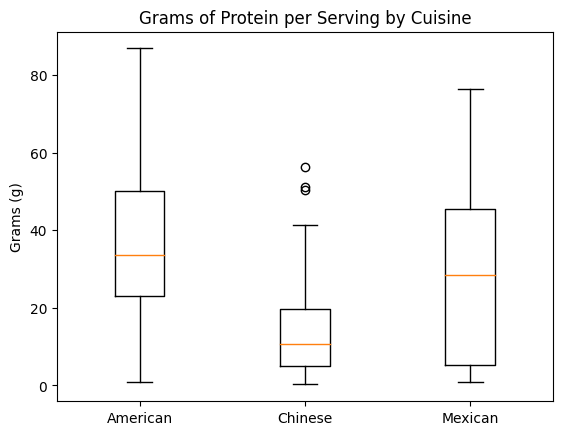

In [476]:
#Generate a box plot that shows the distrubution grams of protein from each cuisine
fig1, ax1 = plt.subplots()
ax1.set_title('Grams of Protein per Serving by Cuisine')
ax1.set_ylabel('Grams (g)')
ax1.boxplot(cusine_macro_list_protein)
ax1.set_xticklabels(['American', 'Chinese',
                    'Mexican'])
plt.show()


In [ ]:
#Create a box and whiskers plot for carbs for amer vs mex vs chin cusines by grams of carbs/serving

# Put cuisines into a list for for loop (and later for plot labels)
cuisine_list = ["American", "Chinese", "Mexican"]

# Create empty list to fill with tumor vol data (for plotting)
cusine_macro_list_carbs = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for cuisine in cuisine_list:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    box_whisker_carbs = recipe_data_df.loc[recipe_data_df["Cuisine"] == cuisine, 'Carbs/serving']

    # add subset 
    cusine_macro_list_carbs.append(box_whisker_carbs)

    # Determine outliers using upper and lower bounds
    quartiles = box_whisker_carbs.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = box_whisker_carbs.loc[(box_whisker_carbs < lower_bound) | (box_whisker_carbs > upper_bound)]
    print(f"{cuisine}'s potential outliers: {outliers}")

American's potential outliers: Series([], Name: Carbs/serving, dtype: float64)
Chinese's potential outliers: Series([], Name: Carbs/serving, dtype: float64)
Mexican's potential outliers: Series([], Name: Carbs/serving, dtype: float64)


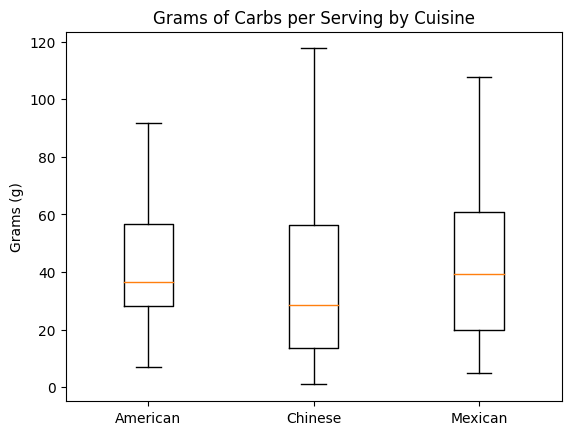

In [474]:
# Generate a box plot that shows the distrubution grams of carbs from each cuisine
fig1, ax1 = plt.subplots()
ax1.set_title('Grams of Carbs per Serving by Cuisine')
ax1.set_ylabel('Grams (g)')
ax1.boxplot(cusine_macro_list_carbs)
ax1.set_xticklabels(['American', 'Chinese',
                    'Mexican'])
plt.show()

In [ ]:
#Create a box and whiskers plot for fats for amer vs mex vs chin cusines by grams of carbs/serving

# Put cuisines into a list for for loop (and later for plot labels)
cuisine_list = ["American", "Chinese", "Mexican"]

# Create empty list to fill with tumor vol data (for plotting)
cusine_macro_list_fats = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for cuisine in cuisine_list:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    box_whisker_fat = recipe_data_df.loc[recipe_data_df["Cuisine"] == cuisine, 'Fat/serving']

    # add subset 
    cusine_macro_list_fats.append(box_whisker_fat)

    # Determine outliers using upper and lower bounds
    quartiles = box_whisker_fat.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = box_whisker_fat.loc[(box_whisker_fat < lower_bound) | (box_whisker_fat > upper_bound)]
    print(f"{cuisine}'s potential outliers: {outliers}")

American's potential outliers: 16    69.59
35    82.60
Name: Fat/serving, dtype: float64
Chinese's potential outliers: 47    41.46
48    45.77
74    41.82
Name: Fat/serving, dtype: float64
Mexican's potential outliers: Series([], Name: Fat/serving, dtype: float64)


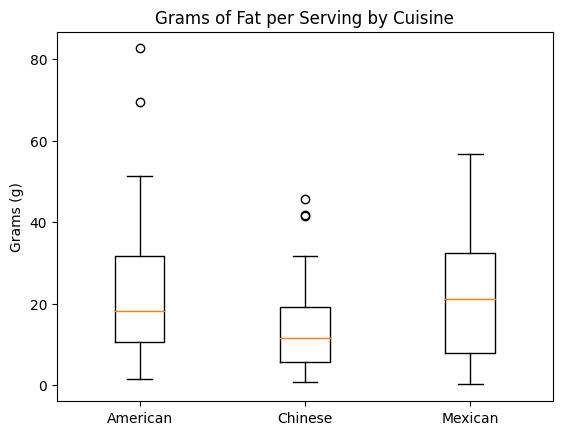

In [ ]:
# Generate a box plot that shows the distrubution grams of fat from each cuisine
fig1, ax1 = plt.subplots()
ax1.set_title('Grams of Fat per Serving by Cuisine')
ax1.set_ylabel('Grams (g)')
ax1.boxplot(cusine_macro_list_fats)
ax1.set_xticklabels(['American', 'Chinese',
                    'Mexican'])
plt.show()